"""

Numpy

Numerical Python

"""

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline

In [3]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Numpy方法比Python内置方法要快10-100倍

In [7]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 21 ms


In [8]:
%time for _ in range(10): my_list2 = my_list * 2

Wall time: 262 ms


In [9]:
data = np.random.randn(2, 3)
data

array([[-0.34077173, -1.0975533 , -0.53510193],
       [-0.02604419, -1.71369353,  0.14219812]])

In [10]:
data * 10

array([[ -3.40771725, -10.975533  ,  -5.35101926],
       [ -0.26044186, -17.13693526,   1.42198125]])

In [11]:
data + data

array([[-0.68154345, -2.1951066 , -1.07020385],
       [-0.05208837, -3.42738705,  0.28439625]])

In [12]:
data.T

array([[-0.34077173, -0.02604419],
       [-1.0975533 , -1.71369353],
       [-0.53510193,  0.14219812]])

ndarray是一个多维同类数据容器

属性

:: shape

:: dtype

:: ndim

In [13]:
data.shape

(2, 3)

In [15]:
data.dtype

dtype('float64')

1. 生成ndarray

In [16]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [20]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print(arr2.dtype)
print(arr2.shape)
print(arr2.ndim)

[[1 2 3 4]
 [5 6 7 8]]
int32
(2, 4)
2


In [21]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [27]:
np.empty((2,3,2)) #尽量不要使用这个，容易返回未初始化的垃圾值

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

数组生成函数

array, asarray, arange, ones, ones_like, zeros, zeros_like, empty, empty_like, full, full_like, eye, identity

In [31]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [33]:
np.identity(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [39]:
np.ones_like(arr2) #根据给定数组，生成一个与输入数组结构一样的全1数组

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

dtype的几种核心类型

int8/16/32/64        |u1/2/4/8                |整型

float16/32/64/128    |f2/4/8/16 or f2/f/d/g   |浮点数

complex64/128/256    |c8/16/32                |复数

bool                 |？                      |布尔值

object               |O（大写）                |python对象

string_              |S                       |例如：‘S10’ 10为长度

unicode_             |U                       |例如：‘U10’

In [40]:
arr1 = np.array([1, 2, 3], dtype = np.float64)
arr2 = np.array([4, 5, 6], dtype = np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


用astype来显式地转换数组的数据类型：

In [42]:
arr = np.array(range(1,10,2))
arr.dtype

dtype('int32')

In [46]:
float_arr = arr.astype(np.float64)
print(float_arr.dtype)
print(float_arr)

float64
[1. 3. 5. 7. 9.]


In [47]:
str1 = 'asdfasd'
str_arr = np.array(str1)
print(str_arr,'\n',str_arr.dtype)

asdfasd 
 <U7


在使用numpy.string_类型的时候千万注意，NumPy会自动修正它的长度或删除输入并且不发出任何警告

In [50]:
strli = ['name1','name2','name3']
li_arr = np.array(strli, dtype = 'S')
print(li_arr,'\n',li_arr.dtype)

[b'name1' b'name2' b'name3'] 
 |S5


In [52]:
int_array = np.arange(10)
calibers = np.array([.22,.27,.35,.50], dtype=np.float64)
int_array.astype(calibers.dtype)


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

2. 数组算术和广播（broadcast）

In [54]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [55]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [56]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [57]:
arr / arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [58]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [59]:
arr **0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [67]:
arr2 = np.random.random((2,3))
print(arr2)
arr2 > arr1

[[0.73706536 0.52399882 0.10769471]
 [0.06277946 0.14564084 0.92239675]]


array([[False, False, False],
       [False, False, False]])

In [68]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [69]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

给数组广播留一个空位，后续补上

3. 数组的索引和切片

In [71]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
arr[5]

5

In [73]:
arr[5:8]

array([5, 6, 7])

数组的切片是原数组的视图，任何对数组视图的修改都会反映到原数组上

In [74]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [76]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [77]:
arr_slice[1] = 12314
arr

array([    0,     1,     2,     3,     4,    12, 12314,    12,     8,
           9])

In [78]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [80]:
arr_co = arr[5:8].copy()
arr_co[:] = 128
print(arr_co)
print(arr_slice)
print(arr)

[128 128 128]
[64 64 64]
[ 0  1  2  3  4 64 64 64  8  9]


2维及以上数组，可以理解为每一个索引值对应的元素不再是单个值，而是一个一维数组

In [81]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [82]:
print(arr2d[0][2])
print(arr2d[0,2])

3
3


arr2d[[0行]][[1列]]

In [87]:
#可以理解为2×2的矩阵，每个矩阵单元是一个3维向量
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
print(arr3d.ndim, arr3d.shape, arr3d.dtype)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
3 (2, 2, 3) int32


In [88]:
#arr3d[0]是一个2×3的数组
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [90]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [91]:
arr3d[1,0] #返回一个1维数组

array([7, 8, 9])

数组的切片索引

In [92]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [93]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [94]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [95]:
arr2d[:2] #左闭右开区间，沿着0轴（也就是行）进行了切片，即返回原数组的前两行。

array([[1, 2, 3],
       [4, 5, 6]])

In [96]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [97]:
arr2d[1, :2]

array([4, 5])

In [99]:
arr2d[:2, 2]

array([3, 6])

In [101]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

布尔索引

In [102]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [103]:
data

array([[-0.26720313,  0.44963045,  0.23912095,  0.63675876],
       [ 0.34642373, -0.08118949,  1.73504342, -2.26836213],
       [ 1.92437769, -0.15500419,  0.1645978 , -0.28978156],
       [ 0.93621008, -0.17049703, -1.33861172,  1.66783023],
       [ 0.48636901,  1.11712459,  0.20894027,  1.33891435],
       [-1.94867674, -0.7475549 , -0.64239571,  0.76136254],
       [ 1.15618542, -0.05116965, -1.25870133, -0.74612087]])

In [104]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [105]:
data[names == 'Bob']

array([[-0.26720313,  0.44963045,  0.23912095,  0.63675876],
       [ 0.93621008, -0.17049703, -1.33861172,  1.66783023]])

In [106]:
data[names == 'Bob', 3]

array([0.63675876, 1.66783023])

In [108]:
data[names == 'Bob', 2:]

array([[ 0.23912095,  0.63675876],
       [-1.33861172,  1.66783023]])

In [109]:
data[~(names == 'Bob')]

array([[ 0.34642373, -0.08118949,  1.73504342, -2.26836213],
       [ 1.92437769, -0.15500419,  0.1645978 , -0.28978156],
       [ 0.48636901,  1.11712459,  0.20894027,  1.33891435],
       [-1.94867674, -0.7475549 , -0.64239571,  0.76136254],
       [ 1.15618542, -0.05116965, -1.25870133, -0.74612087]])

In [110]:
cond = names == 'Bob'
data[~cond]

array([[ 0.34642373, -0.08118949,  1.73504342, -2.26836213],
       [ 1.92437769, -0.15500419,  0.1645978 , -0.28978156],
       [ 0.48636901,  1.11712459,  0.20894027,  1.33891435],
       [-1.94867674, -0.7475549 , -0.64239571,  0.76136254],
       [ 1.15618542, -0.05116965, -1.25870133, -0.74612087]])

In [112]:
mask = (names == 'Bob') | (names == 'Will')

print(data)
print(mask)
data[mask]

[[-0.26720313  0.44963045  0.23912095  0.63675876]
 [ 0.34642373 -0.08118949  1.73504342 -2.26836213]
 [ 1.92437769 -0.15500419  0.1645978  -0.28978156]
 [ 0.93621008 -0.17049703 -1.33861172  1.66783023]
 [ 0.48636901  1.11712459  0.20894027  1.33891435]
 [-1.94867674 -0.7475549  -0.64239571  0.76136254]
 [ 1.15618542 -0.05116965 -1.25870133 -0.74612087]]
[ True False  True  True  True False False]


array([[-0.26720313,  0.44963045,  0.23912095,  0.63675876],
       [ 1.92437769, -0.15500419,  0.1645978 , -0.28978156],
       [ 0.93621008, -0.17049703, -1.33861172,  1.66783023],
       [ 0.48636901,  1.11712459,  0.20894027,  1.33891435]])

In [113]:
data[data < 0] = 0
print(data)

[[0.         0.44963045 0.23912095 0.63675876]
 [0.34642373 0.         1.73504342 0.        ]
 [1.92437769 0.         0.1645978  0.        ]
 [0.93621008 0.         0.         1.66783023]
 [0.48636901 1.11712459 0.20894027 1.33891435]
 [0.         0.         0.         0.76136254]
 [1.15618542 0.         0.         0.        ]]


In [116]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.34642373, 0.        , 1.73504342, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.76136254],
       [1.15618542, 0.        , 0.        , 0.        ]])

神奇索引

In [129]:
arr = np.zeros((8, 4))
print(arr)
for i in range(4):
    arr[i] = i
print(arr)
arr.shape

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


(8, 4)

In [130]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i 
print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


In [131]:
arr[[4, 3, 0, 6]] #内层列表指明了顺序（索引）

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [132]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [133]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] # 坐标（1，0）、（5，3）、（7，1）、（2，2）

array([ 4, 23, 29, 10])

In [134]:
# ??
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

数组转置与轴置换

In [136]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [137]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [138]:
arr = np.random.randn(6, 3)
arr

array([[-0.16861799,  0.75557946,  0.91441187],
       [-0.05240291,  1.14035156, -0.88592545],
       [-1.68594196,  0.10432307,  0.08737146],
       [ 0.35051293, -0.19346691, -0.17441378],
       [-0.54741921, -0.661019  , -2.68420078],
       [ 2.32262026,  0.85418692,  1.31197844]])

In [139]:
np.dot(arr.T, arr)

array([[ 8.69067037,  1.91494903,  4.20041207],
       [ 1.91494903,  3.08619616,  2.61848506],
       [ 4.20041207,  2.61848506, 10.58528815]])

In [140]:
#使用transpose()来置换轴，参数接收轴编号元组
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
arr.transpose((1, 0, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [141]:
# swapaxes() func is very important
print(arr)
arr.swapaxes(1, 2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

4. 通用函数，快速的逐个元素处理函数

In [142]:
#通用函数，又被称为ufunc，可以对ndarray数据中进行逐个元素进行操作的函数。
#通用函数是对接收标量参数的函数的向量化封装
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))
#以上两个为一元通用函数

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [143]:
#二元通用函数如下
x = np.random.randn(8)
y = np.random.randn(8)
print(x,'\n', y)
print(np.maximum(x, y))
print(np.add(x, y))

[-0.61774638  0.88422079 -0.49553639 -0.20094586  0.54161405 -1.02075212
 -1.62582364 -0.98151005] 
 [ 3.2286034  -2.36433064 -1.01852672 -0.63908079 -0.25483282 -1.07139039
  0.12243491 -0.36910208]
[ 3.2286034   0.88422079 -0.49553639 -0.20094586  0.54161405 -1.02075212
  0.12243491 -0.36910208]
[ 2.61085702 -1.48010985 -1.51406311 -0.84002665  0.28678123 -2.0921425
 -1.50338873 -1.35061213]


In [146]:
#modf()可以返回多个数组，divmod的向量化版本，返回一个元组（小数部分，整数部分）
arr = np.random.randn(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(whole_part)

[-2.13032646  1.31177463  3.7258091  -4.10342403  0.20447916 -2.36533875
 -1.01360874]
[-2.  1.  3. -4.  0. -2. -1.]


In [149]:
#可选位置参数out
print(arr)
np.sqrt(arr,arr)

[-2.13032646  1.31177463  3.7258091  -4.10342403  0.20447916 -2.36533875
 -1.01360874]


C:\Program Files\Python35\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


array([       nan, 1.1453273 , 1.9302355 ,        nan, 0.45219372,
              nan,        nan])

一元ufunc

abs,fabs,sqrt,square,exp,log,log10,log2,log1p,sign,ceil,floor,rint,modf,isnan,isfinite,isinf

cos,cosh,sin,sinh,tan,tanh,arccos,arccosh,arcsin,arcsinh,arctan,arctanh,logical_not

二元ufunc

add,substract,multiply,divide,floor_divide,power,maximum,fmax,minimum,fmin(fmax和fmin忽略NaN),mod,copysign

greater,greater_equal,less,less_equal,not_equal,logical_and,logical_or,logical_xor

面向数组的编程，加快数据计算速度

In [150]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
print(ys)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [152]:
help(np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

In [153]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

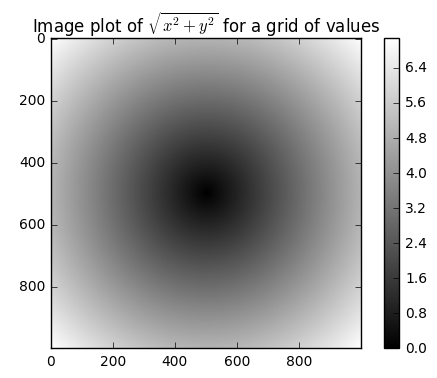

In [154]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

数组中的条件逻辑

In [165]:
xarr = np.arange(1, 1.5, 0.1)

In [166]:
yarr = np.arange(2, 2.5, 0.1)
print(xarr)
print(yarr)

[1.  1.1 1.2 1.3 1.4]
[2.  2.1 2.2 2.3 2.4]


In [167]:
cond = np.array([True, False, True, True, False])
res = [(x if c else y) 
       for x, y, c in zip(xarr, yarr, cond)]

In [168]:
res

[1.0, 2.1, 1.2000000000000002, 1.3000000000000003, 2.4000000000000004]

In [170]:
# np.where
res = np.where(cond, xarr, yarr)
res

array([1. , 2.1, 1.2, 1.3, 2.4])

In [171]:
#利用已有的一个数组生成一个新数组
#np.where的典型应用
arr = np.random.randn(4, 4)
arr

array([[-0.10053949,  0.75027794,  0.82272428,  0.78278884],
       [ 0.68099308,  1.9096609 , -1.29648456,  0.02331559],
       [ 0.36472985, -0.11923061, -1.94477779,  0.91767154],
       [-2.11023517,  1.58426277, -1.01088171,  1.7182895 ]])

In [172]:
arr > 0

array([[False,  True,  True,  True],
       [ True,  True, False,  True],
       [ True, False, False,  True],
       [False,  True, False,  True]])

In [173]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [-2,  2, -2,  2]])

In [175]:
#传递给where的变量既可以是标量，也可以是数组
np.where(arr > 0, 2, arr)
#正值被替换为2，其余保持arr

array([[-0.10053949,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -1.29648456,  2.        ],
       [ 2.        , -0.11923061, -1.94477779,  2.        ],
       [-2.11023517,  2.        , -1.01088171,  2.        ]])

数学和统计方法（函数）

In [176]:
arr = np.random.randn(5, 4)
arr

array([[ 0.44084611,  0.80189108, -3.0732474 , -0.45078406],
       [ 0.76161573,  0.01903559,  0.24724161,  1.33820034],
       [ 0.8675423 ,  0.17982177,  0.62146072,  1.02213419],
       [-0.14590349,  1.33579076,  0.51061883,  1.46888399],
       [ 1.30952421,  0.13200615,  0.02202541,  0.985173  ]])

In [177]:
arr.mean()

0.41969384235455315

In [178]:
np.mean(arr)

0.41969384235455315

In [179]:
arr.sum()

8.393876847091063

In [181]:
print(arr)
arr.mean(axis=1)

[[ 0.44084611  0.80189108 -3.0732474  -0.45078406]
 [ 0.76161573  0.01903559  0.24724161  1.33820034]
 [ 0.8675423   0.17982177  0.62146072  1.02213419]
 [-0.14590349  1.33579076  0.51061883  1.46888399]
 [ 1.30952421  0.13200615  0.02202541  0.985173  ]]


array([-0.57032357,  0.59152332,  0.67273974,  0.79234752,  0.61218219])

In [182]:
arr.sum(axis=0)

array([ 3.23362485,  2.46854536, -1.67190083,  4.36360746])

arr.mean(1)表示计算每横行的平均值；arr.sum(0)表示计算每一竖行轴向的累积和。

In [184]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print(arr)
arr.cumsum()

[0 1 2 3 4 5 6 7]


array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [185]:
arr = np.array(range(9)).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [186]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [187]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

常用NumPy基础素组统计方法：

sum，mean，std（标准差），var（方差），min，max，argmin，argmax（最大值位置），cumsum（累和），cumprod（累乘）

布尔值数组的方法

In [191]:
#可用sum计算布尔值数组中为True的次数
arr = np.random.randn(100)
#print(arr)
(arr > 0).sum()

54

In [193]:
#any 和 all方法比较常用，检查数组中是至少有一个为真，还是每一个值为真
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


数组排序方法

In [196]:
arr = np.random.randn(6)
print(arr)
print(np.sort(arr))

[ 1.49905383 -0.38955867 -0.86818953 -1.20493653  0.43075408 -0.15076159]
[-1.20493653 -0.86818953 -0.38955867 -0.15076159  0.43075408  1.49905383]


In [198]:
arr = np.random.randn(5,3)
print(arr)
print(np.sort(arr,axis=1))
#np.sort返回的是原数组的copy，而arr.sort()是就地排序。

[[-0.03861011 -0.73066971  0.57656769]
 [ 0.08723554 -0.16249994 -1.4784128 ]
 [ 0.25130428  0.67144089 -0.62354752]
 [ 0.69091427 -0.47139932 -1.43314773]
 [ 0.56939984  1.43915918  0.91928813]]
[[-0.73066971 -0.03861011  0.57656769]
 [-1.4784128  -0.16249994  0.08723554]
 [-0.62354752  0.25130428  0.67144089]
 [-1.43314773 -0.47139932  0.69091427]
 [ 0.56939984  0.91928813  1.43915918]]


根据数据表中某一列进行排序将成为未来数据分析和聚的常用手段，因此需要掌握“间接排序”这项技术

唯一值与其它集合逻辑

In [200]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
print(sorted(set(names)))

['Bob' 'Joe' 'Will']
['Bob', 'Joe', 'Will']


主要方法：unique(x),intersect1d(x, y),union1d(x, y),in1d(x, y),setdiff1d(x, y),setxro1d(x, y)

5. 线性代数

In [204]:
x = np.array(range(1,7), dtype='f').reshape(2, 3)
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x,'\n\n' ,y)

[[1. 2. 3.]
 [4. 5. 6.]] 

 [[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [206]:
print(x.dot(y))
print(np.dot(x,y))

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]


In [207]:
np.dot(x, np.ones(3))

array([ 6., 15.])

np.linalg

In [210]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 3.31217476,  1.77286937, -1.79298886, -1.85836826, -0.86282842],
       [ 1.77286937,  3.35326726, -1.92338016, -1.47967651,  1.47703041],
       [-1.79298886, -1.92338016,  5.39077505, -0.42721929, -2.92901888],
       [-1.85836826, -1.47967651, -0.42721929, 10.50055555,  1.67418451],
       [-0.86282842,  1.47703041, -2.92901888,  1.67418451,  4.06720641]])

In [209]:
inv(mat)

array([[11.14938833,  5.02533413, -0.97605367, -9.2019849 ,  0.85668041],
       [ 5.02533413,  2.58933424, -0.3504276 , -4.13693121,  0.25143962],
       [-0.97605367, -0.3504276 ,  0.22032553,  0.748955  , -0.04847843],
       [-9.2019849 , -4.13693121,  0.748955  ,  7.77849674, -0.82630672],
       [ 0.85668041,  0.25143962, -0.04847843, -0.82630672,  0.33021041]])

diag将矩阵的对角线元素作为1维数组返回，或反转换

dot矩阵点乘

trace计算对角元素之和

det计算矩阵的行列式

eig计算矩阵的特征值和特征向量

inv计算矩阵的逆矩阵

pinv计算矩阵的MOORE-PENROSE伪逆矩阵

qr计算QR分解

svd计算奇异值分解

solve求解x的线性系统Ax = b，其中A为方阵

lstsq计算Ax = b的最小二乘解

6. 伪随机数的生成



np.numpy填补了Python内建模块random的不足，用于高效地生成各种概率分布下的完整样本值数组。

In [211]:
samples = np.random.normal(size=(4,4))
samples

array([[-1.09643585, -1.25189419, -1.26450647,  0.85877454],
       [ 1.40586335, -0.9441546 ,  0.51375593, -1.29747209],
       [ 1.05901095,  0.47302892,  0.40503761, -0.395912  ],
       [-2.32928611, -0.29207425,  0.3605263 , -0.45599977]])

In [212]:
from random import normalvariate

N = 10000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 8.73 s per loop


In [213]:
%timeit np.random.normal(size=N)

1 loop, best of 3: 292 ms per loop


伪随机数，由确定性行为的算法根据随机数生成器中的随机数种子（seed）生成的。

In [214]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

numpy.random中的部分函数列表：

seed向随机数生成器传递随机状态种子

permutation返回一个序列的随机排列

shuffle随机排列一个序列

rand从均匀分布中抽取样本

randint根据给定的由低到高的范围抽取随机整数

randn从均值0方差1的正态分布中抽取样本

binomial从二项分布中抽取样本

normal从正态（高斯）分布中抽取样本

beta从beta分布中抽取样本

chisquare从卡方分布中抽取样本

gamma从伽马分布中抽取样本

uniform从均匀[0, 1)分布中抽取样本

随机漫步示例

In [220]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

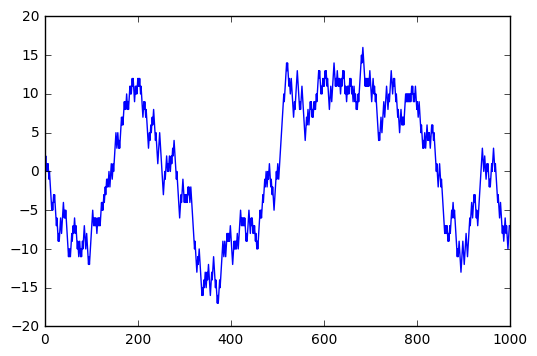

In [222]:
plt.plot(walk[:1000])

maximum and minimum values in walking: -12, 26, seperately


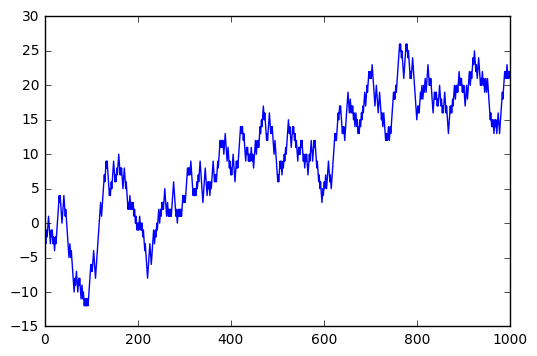

In [224]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print("maximum and minimum values in walking: {0}, {1}, seperately".format(walk.min(), walk.max()))
plt.plot(walk[:1000])

In [226]:
(np.abs(walk) >= 10).argmax()

63

In [227]:
nwalks = 5000; nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -1, ...,  -4,  -3,  -2],
       [ -1,  -2,  -1, ...,  22,  23,  24],
       [ -1,   0,  -1, ...,  12,  13,  12],
       ...,
       [ -1,  -2,  -1, ...,  40,  39,  40],
       [  1,   2,   3, ..., -16, -15, -14],
       [ -1,  -2,  -1, ...,  16,  17,  16]], dtype=int32)

In [235]:
walks.max()

123

In [236]:
walks.min()

-124

In [237]:
hists30 = (np.abs(walks) >= 30).any(1)

In [238]:
hists30

array([ True,  True,  True, ...,  True, False, False])

In [239]:
hists30.sum()

3359

In [241]:
crossing_times = (np.abs(walks[hists30]) >= 30).argmax(1)
crossing_times.mean()

497.72759749925575

In [230]:
help(np.cumsum)

Help on function cumsum in module numpy.core.fromnumeric:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See `doc.ufuncs`

In [232]:
print(np.cumsum(np.array([1,2,3,4,5,6])))
print(np.cumsum(np.array(range(9)).reshape(3, 3)))

[ 1  3  6 10 15 21]
[ 0  1  3  6 10 15 21 28 36]


In [234]:
np.cumsum(np.array(range(9)).reshape(3, 3),axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)